# Exploratory data analysis (EDA) of apartments data

## Libraries and settings

In [1197]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/DA_Project/Project/Minimum/4


## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched apartment data

In [1198]:
# Read and select variables
df = pd.read_csv("bmw_data_enriched.csv")[[ 'web-scraper-order', 
                                                        'model_raw',
                                                        'Location',
                                                        'PLZ',
                                                        'Year',
                                                        'price',
                                                        'km',
                                                        'km_per_year',]]

# Remove duplicates
df = df.drop_duplicates()
df.head(5)

# Remove missing values
df = df.dropna()
df.head(5)

,web-scraper-order,model_raw,Location,PLZ,Year,price,km,km_per_year
0,1704481912-1,220d xDrive Gran Tourer Steptronic,VD,1299,2017,21000,107000,15285.71
1,1704481912-2,X5M Steptronic,SG,8730,2016,38500,171000,21375.00
2,1704481912-3,X3 M40d Individual Steptronic,FR,3178,2019,44990,88900,17780.00
3,1704481912-4,X5 xDrive 30d Steptronic,BL,4461,2016,26500,164900,20612.50
4,1704481912-5,320i Cabriolet Steptronic,BL,4461,2010,16750,79600,5685.71


### Quantiles original values

In [1199]:
df[['price','km', 'km_per_year', 'Year']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,price,km,km_per_year,Year
0.05,8900.0,33600.0,5685.71,2007.0
0.10,15965.0,57270.0,8128.57,2009.7
0.25,21000.0,79600.0,11070.00,2014.0
0.50,25700.0,98550.0,13788.66,2016.5
0.75,38500.0,164900.0,17780.00,2019.0
0.90,46880.0,178900.0,20688.75,2019.1
0.95,63890.0,250000.0,21375.00,2020.0


### Shape (number of rows and colums)

In [1200]:
# Number of rows and columns
print(df.shape)

(50, 8)


### Data types

In [1201]:
df.dtypes

web-scraper-order     object
model_raw             object
Location              object
PLZ                    int64
Year                   int64
price                  int64
km                     int64
km_per_year          float64
dtype: object

### Summary statistics of numeric variables

In [1202]:
df.describe()

,PLZ,Year,price,km,km_per_year
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,5012.800000,2015.500000,30392.000000,115570.000000,13976.623000
std,2224.004102,3.970555,15336.657966,60732.435102,4833.729511
min,1299.000000,2007.000000,8900.000000,33600.000000,5685.710000
25%,3930.000000,2014.000000,21000.000000,79600.000000,11070.000000
50%,4461.000000,2016.500000,25700.000000,98550.000000,13788.655000
75%,6210.000000,2019.000000,38500.000000,164900.000000,17780.000000
max,8735.000000,2020.000000,63890.000000,250000.000000,21375.000000


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [1203]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.km_per_year.median(), 1),
      'Std:', round(df.km_per_year.std(), 1))

# km
print('km:',
      'Count:', round(df.km.count(), 1),
      'Min:', round(df.km.min(), 1),
      'Max:', round(df.km.max(), 1),
      'Mean:', round(df.km.mean(), 1),
      'Median:', round(df.km.median(), 1),
      'Std:', round(df.km.std(), 1))

# km_per_year
print('km_per_year:',
      'Count:', round(df.km_per_year.count(), 1),
      'Min:', round(df.km_per_year.min(), 1),
      'Max:', round(df.km_per_year.max(), 1),
      'Mean:', round(df.km_per_year.mean(), 1),
      'Median:', round(df.km_per_year.median(), 1),
      'Std:', round(df.km_per_year.std(), 1))

Price: Count: 50 Min: 8900 Max: 63890 Mean: 30392.0 Median: 13788.7 Std: 4833.7
km: Count: 50 Min: 33600 Max: 250000 Mean: 115570.0 Median: 98550.0 Std: 60732.4
km_per_year: Count: 50 Min: 5685.7 Max: 21375.0 Mean: 13976.6 Median: 13788.7 Std: 4833.7


### Skewness

In [1204]:
df[['km_per_year','km', 'km_per_year']].skew()

km_per_year   -0.021068
km             0.908023
km_per_year   -0.021068
dtype: float64

### Kurtosis

In [1205]:
df[['price','km', 'km_per_year']].kurtosis()

price          0.088432
km             0.192401
km_per_year   -0.883904
dtype: float64

### Extreme values

In [1206]:
# Very low mileage per year
df[df['km_per_year'] <= 5000]

,web-scraper-order,model_raw,Location,PLZ,Year,price,km,km_per_year


In [1207]:
# Very high mileage per year
df[df['km_per_year'] >= 20000]

,web-scraper-order,model_raw,Location,PLZ,Year,price,km,km_per_year
1,1704481912-2,X5M Steptronic,SG,8730,2016,38500,171000,21375.0
3,1704481912-4,X5 xDrive 30d Steptronic,BL,4461,2016,26500,164900,20612.5
11,1704481916-12,X5M Steptronic,SG,8730,2016,38500,171000,21375.0
13,1704481916-14,X5 xDrive 30d Steptronic,BL,4461,2016,26500,164900,20612.5
21,1704481921-22,X5M Steptronic,SG,8730,2016,38500,171000,21375.0
23,1704481921-24,X5 xDrive 30d Steptronic,BL,4461,2016,26500,164900,20612.5
31,1704481925-32,X5M Steptronic,SG,8730,2016,38500,171000,21375.0
33,1704481925-34,X5 xDrive 30d Steptronic,BL,4461,2016,26500,164900,20612.5
41,1704481929-42,X5M Steptronic,SG,8730,2016,38500,171000,21375.0
43,1704481929-44,X5 xDrive 30d Steptronic,BL,4461,2016,26500,164900,20612.5


### Get a list of categories of categorical variable

In [1208]:
np.array(pd.Categorical(df['km_per_year']).categories)

array([ 5685.71,  8400.  , 11070.  , 11980.  , 12871.43, 14705.88,
       15285.71, 17780.  , 20612.5 , 21375.  ])

## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [1209]:
pd.crosstab(df['km_per_year'], df['Year'])

Year,2007,2010,2014,2016,2017,2019,2020
km_per_year,,,,,,,
5685.71,0,5,0,0,0,0,0
8400.00,0,0,0,0,0,0,5
11070.00,0,0,5,0,0,0,0
11980.00,0,0,0,0,0,5,0
12871.43,0,0,0,0,5,0,0
14705.88,5,0,0,0,0,0,0
15285.71,0,0,0,0,5,0,0
17780.00,0,0,0,0,0,5,0
20612.50,0,0,0,5,0,0,0


### Pivot tables

In [1210]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['Year','price','km','km_per_year']],
               index=['Year','price'],
               values=['km','km_per_year'],
               aggfunc=(np.mean, 'count'))

km           km_per_year          
           count      mean       count      mean
Year price                                      
2007 8900      5  250000.0           5  14705.88
2010 16750     5   79600.0           5   5685.71
2014 21500     5  110700.0           5  11070.00
2016 26500     5  164900.0           5  20612.50
     38500     5  171000.0           5  21375.00
2017 21000     5  107000.0           5  15285.71
     24900     5   90100.0           5  12871.43
2019 44990     5   88900.0           5  17780.00
     63890     5   59900.0           5  11980.00
2020 36990     5   33600.0           5   8400.00

### Correlation matrix

In [1211]:
corr = df[['Year','price','km','km_per_year']].cov().corr()
corr

,Year,price,km,km_per_year
Year,1.000000,0.989992,-0.994683,-0.966418
price,0.989992,1.000000,-0.972035,-0.926008
km,-0.994683,-0.972035,1.000000,0.987709
km_per_year,-0.966418,-0.926008,0.987709,1.000000


### Covariance matrix

In [1212]:
cov = df[['Year','price','km','km_per_year']].cov()
cov

,Year,price,km,km_per_year
Year,15.765306,4.580204e+04,-1.625765e+05,3.297253e+03
price,45802.040816,2.352131e+08,-4.767713e+08,1.051586e+07
km,-162576.530612,-4.767713e+08,3.688429e+09,1.664914e+08
km_per_year,3297.252551,1.051586e+07,1.664914e+08,2.336494e+07


## Univariate graphical exploratory data analysis (EDA)

### Boxplot (seaborn) km

<Axes: xlabel='km'>

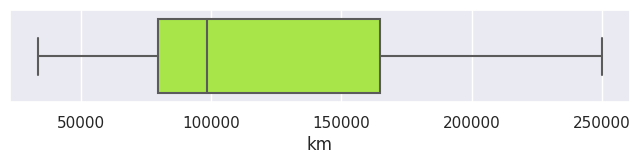

In [1213]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['km'], color="greenyellow")

### Boxplot (seaborn) km per year

<Axes: xlabel='km_per_year'>

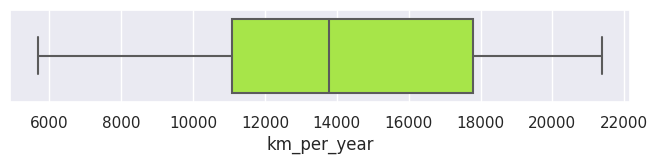

In [1214]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['km_per_year'], color="greenyellow")

### Histogram  (matplotlib)  km

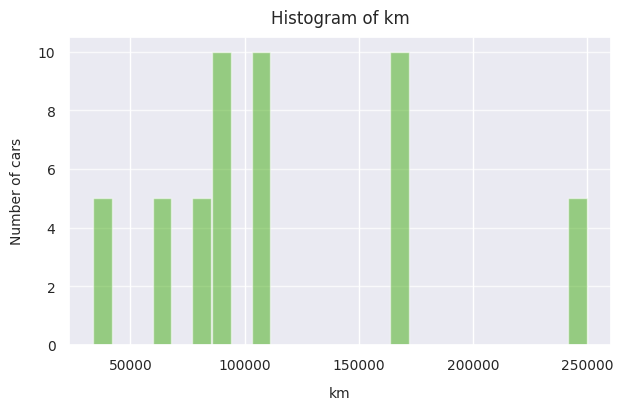

In [1215]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Histogram
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df['km'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('km', fontsize=10, labelpad=10)
plt.ylabel('Number of cars', fontsize=10, labelpad=10)
plt.title('Histogram of km', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Histogram  (matplotlib)  km per year

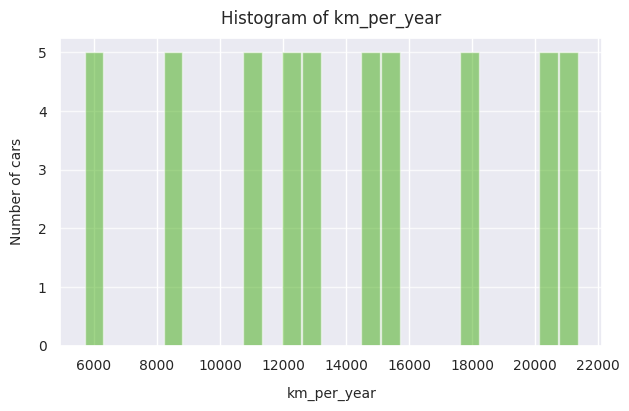

In [1216]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Histogram
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df['km_per_year'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('km_per_year', fontsize=10, labelpad=10)
plt.ylabel('Number of cars', fontsize=10, labelpad=10)
plt.title('Histogram of km_per_year', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Density plot  (seaborn) km per year

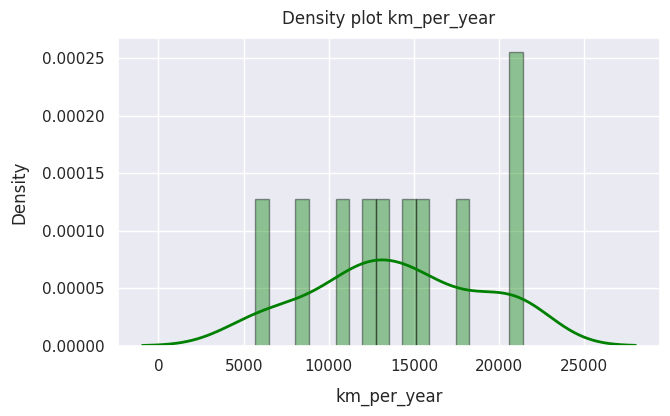

In [1217]:
plt.figure(figsize=(7,4))
sns.distplot(df['km_per_year'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot km_per_year', fontsize=12, pad=10)
plt.xlabel('km_per_year', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

### Density plot  (seaborn) km

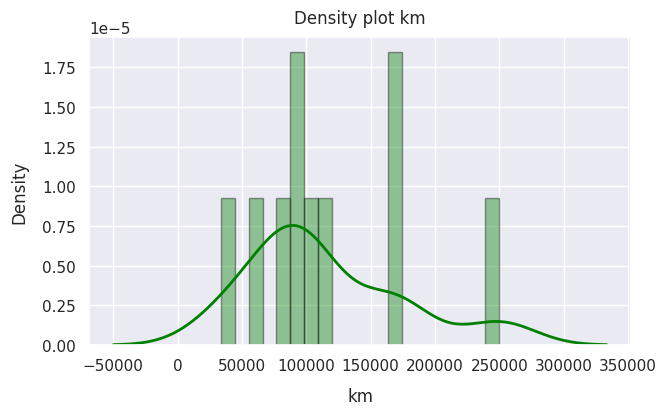

In [1218]:
plt.figure(figsize=(7,4))
sns.distplot(df['km'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot km', fontsize=12, pad=10)
plt.xlabel('km', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

### Quantile-Quantile (QQ-) plot km

        km       var
49   33600 -1.349691
39   33600 -1.349691
29   33600 -1.349691
9    33600 -1.349691
19   33600 -1.349691
38   59900 -0.916644
28   59900 -0.916644
48   59900 -0.916644
8    59900 -0.916644
18   59900 -0.916644
44   79600 -0.592270
34   79600 -0.592270
14   79600 -0.592270
24   79600 -0.592270
4    79600 -0.592270
12   88900 -0.439139
42   88900 -0.439139
2    88900 -0.439139
22   88900 -0.439139
32   88900 -0.439139
46   90100 -0.419381
16   90100 -0.419381
36   90100 -0.419381
6    90100 -0.419381
26   90100 -0.419381
40  107000 -0.141111
30  107000 -0.141111
0   107000 -0.141111
10  107000 -0.141111
20  107000 -0.141111
25  110700 -0.080188
5   110700 -0.080188
15  110700 -0.080188
45  110700 -0.080188
35  110700 -0.080188
43  164900  0.812251
3   164900  0.812251
33  164900  0.812251
23  164900  0.812251
13  164900  0.812251
11  171000  0.912692
41  171000  0.912692
1   171000  0.912692
21  171000  0.912692
31  171000  0.912692
37  250000  2.213479
27  250000  2

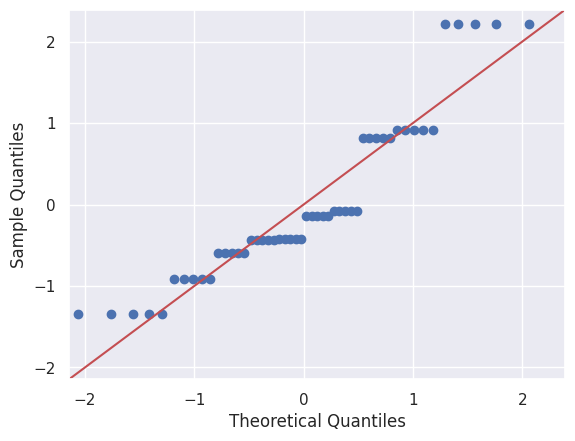

In [1219]:
# Variable (standardized)
x = 'km'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['km', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

In [1220]:
# Group data by km_per_year (only the topmost 15 values are shown)
df_bar = df['km_per_year'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
index

[15285.71,
 21375.0,
 17780.0,
 20612.5,
 5685.71,
 11070.0,
 12871.43,
 14705.88,
 11980.0,
 8400.0]

### Piechart (matplotlib)

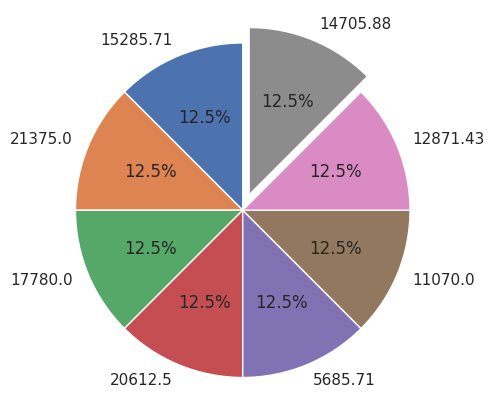

In [1221]:
# Group data by km_per_year (only the 8 most frequently occurencies by km_per_year)
df_bar = df.km_per_year.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0, 0, 0, 0.0, 0, 0, 0.1) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        explode=explode,
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

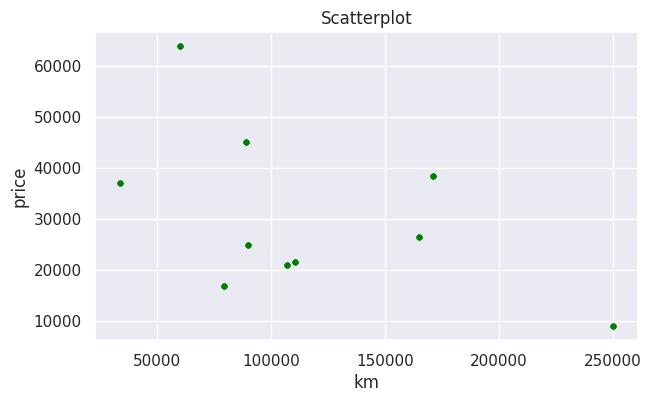

In [1222]:
plt.figure(figsize=(7,4))
plt.scatter(df['km'], 
           df['price'], 
           color="green", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('km')
plt.ylabel('price')
plt.show()

### Scatterplot (matplotlib) with regression line

(50, 9)
-0.1292613488056595
45330.73408147005


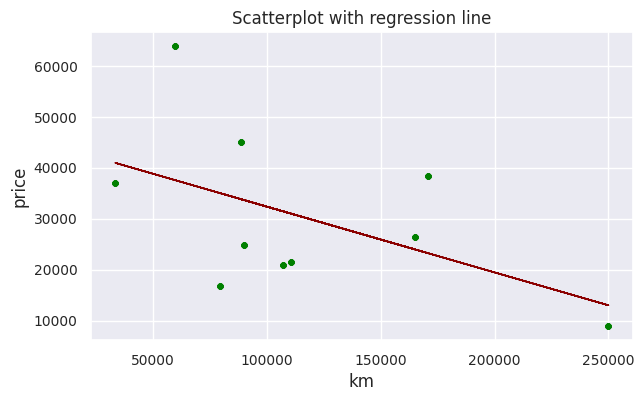

In [1223]:
# Subset
df_sub = df.loc[(df.price >= 1000)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.km, 
         df_sub.price, 
         'o', 
         markersize=3.5,
         color="green")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.km, df_sub.price, 1)
print(b)
print(a)

# Plot regression line
plt.plot(df_sub.km, 
         b*df_sub.km + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('km', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Scatterplot-matrix (seaborn)

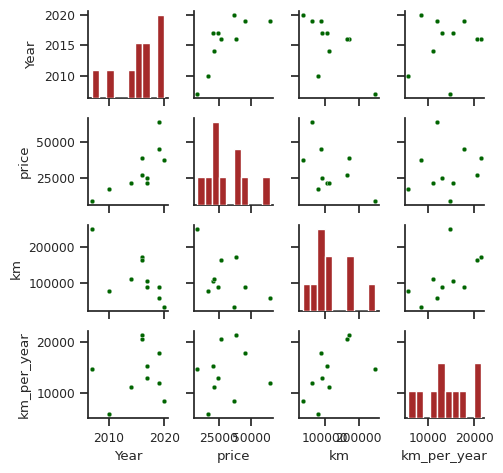

In [1224]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[[   'Year',
                        'price',
                        'km',
                        'km_per_year']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Hexagonal binning plot  (matplotlib)

(30, 9)


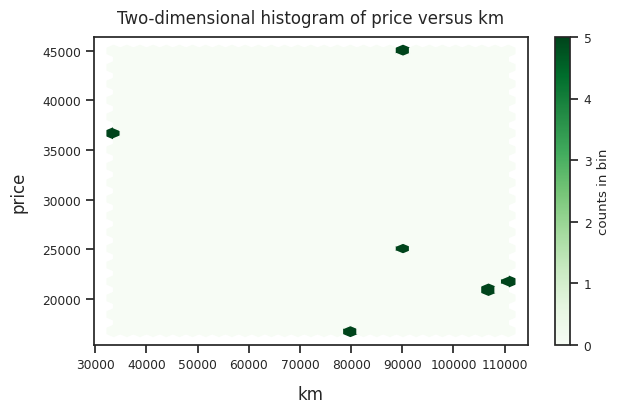

In [1225]:
# Subset
df_sub = df.loc[(df.km <= 120000) & (df.price <= 60000)]
print(df_sub.shape)

# Plot
fig = plt.figure( figsize=(7,4) )
plt.hexbin(df_sub.km, df_sub.price, gridsize=30, cmap='Greens')

# Set labels
plt.xlabel('km', fontsize=12, labelpad=10)
plt.ylabel('price', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of price versus km', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

### Correlation heatmap (seaborn)

<Axes: >

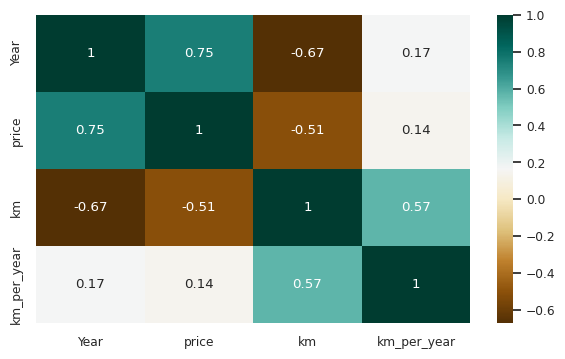

In [1226]:
# Set font size for plot
sns.set(font_scale=0.8)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df[[  'Year',
                    'price',
                    'km',
                    'km_per_year']].corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

### Bubble plot (seaborn)

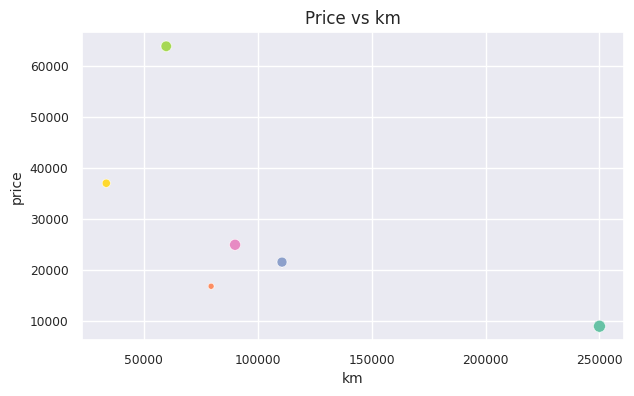

In [1227]:
# Subset of df
df_sub = df.loc[(df['km_per_year'] >= 2000) & (df['km_per_year'] <= 15000)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="km", 
                     y="price",
                     size="km_per_year", # determines bubble size
                     hue="Year",  # determines color
                     palette="Set2",
                     data=df_sub)

# Set title and axes
ax.set_title('Price vs km', fontsize = 12)
ax.set_xlabel('km', fontsize = 10)
ax.set_ylabel('price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [1228]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.2.0-1018-azure
Datetime: 2024-01-11 21:48:20
Python Version: 3.10.13
-----------------------------------
